In [5]:

# Analyzing Salesforce or similar CRM data involves a range of techniques and approaches aimed at understanding customer behavior, optimizing 
# sales processes, and improving overall business performance.

# We can undertake several strategies to extract useful insights from any kind of CRM data:
# 1. Customer Segmentation
# 2. Predictive Analytics
# 3. Sales and Marketing Effectiveness
# 4. Customer Experience and Satisfaction
# 5. Operational Efficiency
# 6. Financial Performance and Forecasting



# Implementation Steps:
    
# Data Preparation: Cleanse and preprocess CRM data to ensure accuracy and consistency. This may involve handling missing values, 
# encoding categorical variables, and normalizing numerical data.

# Exploratory Data Analysis (EDA): Explore relationships between variables, visualize trends, and identify patterns using techniques 
# such as scatter plots, histograms, and correlation matrices.

# Model Building and Evaluation: Develop predictive models, clustering algorithms, or statistical analyses tailored to specific 
# business questions and objectives. Evaluate model performance using appropriate metrics (e.g., accuracy, precision, recall, RMSE, R-squared).

# Actionable Insights: Translate analytical findings into actionable insights and strategic recommendations. Collaborate with 
# cross-functional teams (sales, marketing, customer support) to implement changes and measure impact over time.

# By leveraging these types of analyses on Salesforce or CRM data, organizations can gain deeper insights into customer behavior, 
# improve operational efficiency, enhance customer satisfaction, and drive revenue growth. The specific analyses chosen should align 
# with business goals and priorities to deliver meaningful outcomes and competitive advantages.


In [89]:

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Number of records
num_records = 1000

# Generate synthetic Salesforce data (CRM data)
np.random.seed(42)  # For reproducibility

client_id = np.arange(1, num_records + 1)
age = np.random.randint(18, 70, size=num_records)
company_size = np.random.choice(['Small', 'Medium', 'Large'], size=num_records, p=[0.5, 0.3, 0.2])
industry = np.random.choice(['Tech', 'Finance', 'Retail', 'Healthcare', 'Manufacturing'], size=num_records)
annual_revenue = np.random.randint(100000, 10000000, size=num_records)
years_with_company = np.random.randint(1, 20, size=num_records)
number_of_purchases = np.random.randint(1, 100, size=num_records)
average_purchase_value = np.round(np.random.uniform(100, 10000, size=num_records), 2)
last_purchase_days_ago = np.random.randint(1, 365, size=num_records)
is_high_value_client = np.random.choice([0, 1], size=num_records, p=[0.7, 0.3])


# Brief Explanation of Features:
# client_id: Sequential numbers to uniquely identify each client.
# age: Random integer values between 18 and 70.
# company_size: Categorical feature with values 'Small', 'Medium', 'Large'.
# industry: Categorical feature with values representing different industries.
# annual_revenue: Random integer values between 100,000 and 10,000,000.
# years_with_company: Random integer values between 1 and 20.
# number_of_purchases: Random integer values between 1 and 100.
# average_purchase_value: Random float values between 100 and 10,000.
# last_purchase_days_ago: Random integer values between 1 and 365.
# is_high_value_client: Binary values (0 or 1) indicating whether the client is high value, with a probability distribution of 70% for 0 and 30% for 1.


# Create a DataFrame
data = pd.DataFrame({
    'client_id': client_id,
    'age': age,
    'company_size': company_size,
    'industry': industry,
    'annual_revenue': annual_revenue,
    'years_with_company': years_with_company,
    'number_of_purchases': number_of_purchases,
    'average_purchase_value': average_purchase_value,
    'last_purchase_days_ago': last_purchase_days_ago,
    'is_high_value_client': is_high_value_client
})

# Save the synthetic data to a CSV file...optional
# data.to_csv('synthetic_crm_data.csv', index=False)

# Display the first few rows
print(data.head())

# Create a DataFrame
data = pd.DataFrame({
    'client_id': client_id,
    'age': age,
    'company_size': company_size,
    'industry': industry,
    'annual_revenue': annual_revenue,
    'years_with_company': years_with_company,
    'number_of_purchases': number_of_purchases,
    'average_purchase_value': average_purchase_value,
    'last_purchase_days_ago': last_purchase_days_ago,
    'is_high_value_client': is_high_value_client
})

# Save the synthetic data to a CSV file...optional
# data.to_csv('synthetic_crm_data.csv', index=False)

# what does the data look like?
print(data.columns)
print(data.shape)
print(data.head())


   client_id  age company_size       industry  annual_revenue  \
0          1   56       Medium     Healthcare         6399492   
1          2   69        Small         Retail         5898946   
2          3   46        Small  Manufacturing         7336694   
3          4   32        Small     Healthcare         6028643   
4          5   60        Small     Healthcare         9824700   

   years_with_company  number_of_purchases  average_purchase_value  \
0                  13                    1                 8380.57   
1                  15                   84                 5074.41   
2                   3                   44                  242.37   
3                  11                   87                 8049.51   
4                  14                   96                 9809.86   

   last_purchase_days_ago  is_high_value_client  
0                     246                     0  
1                     297                     0  
2                     172             

In [69]:

# Let's run a Regression Experiment

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



# Create the target variable (dependent variable)
target = data['average_purchase_value']

# Select features (excluding client_id (IDs aren't useful fro making predictions) and target variable)
my_data = data
features = my_data.drop(columns=['client_id','average_purchase_value'])

# Initialize LabelEncoder
le = LabelEncoder()


# a regression model can only work with numeric data. To use non-numeric (categorical) data in regression models, you need to convert these 
# categorical variables into a numeric format. There are several ways to encode categorical data:

# Label Encoding: This assigns each unique category a different integer value. This method is suitable for ordinal categories where the order 
# of values matters.
# Label Encoding is also known as Categorical Encoding
# One-Hot Encoding: This creates a new binary column for each category. This method is suitable for nominal categories where the order of values 
# does not matter.
    
# Apply LabelEncoder to each categorical column
for column in ['age', 'company_size', 'industry', 'annual_revenue',
       'years_with_company', 'number_of_purchases', 
       'last_purchase_days_ago', 'is_high_value_client']:
    features[column] = le.fit_transform(features[column])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test_scaled)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Mean Squared Error: 8503606.498080542
Mean Squared Error (MSE): 8503606.498080542
Root Mean Squared Error (RMSE): 2916.094391147266
Mean Absolute Error (MAE): 2480.3898945
R-squared (R²): -0.15378088579081095
Mean Absolute Percentage Error (MAPE): 179.57640435232997%


In [ ]:

# Let's understand some terminology here...
# MSE (Mean Squared Error): Measures the average of the squares of the errors, giving more weight to larger errors.
# RMSE (Root Mean Squared Error): The square root of MSE, which is in the same unit as the target variable and easier to interpret.
# MAE (Mean Absolute Error): The average of absolute differences between the actual and predicted values, giving equal weight to all errors.
# R² (R-squared): Indicates how well the model fits the data, with values closer to 1 indicating a better fit.
# MAPE (Mean Absolute Percentage Error): Provides a percentage error, making it easier to interpret the magnitude of errors relative to the 
# actual values.


In [ ]:

# Unfortunately, -0.1537 is a horrible R^2. We have to take some time to see what's going on here before we can move forward with our analysis.
# Let's try a different approach.


Cross-validated R-squared scores: [-0.06283879 -0.04142935 -0.09459908 -0.08023237 -0.02561033]
Average R-squared score: -0.06094198456397355
                  Feature  Importance
6  last_purchase_days_ago    0.201191
3          annual_revenue    0.193516
5     number_of_purchases    0.182818
0                     age    0.159167
4      years_with_company    0.133072
2                industry    0.068915
1            company_size    0.038903
7    is_high_value_client    0.022418


Text(0.5, 1.0, 'Feature Importance')

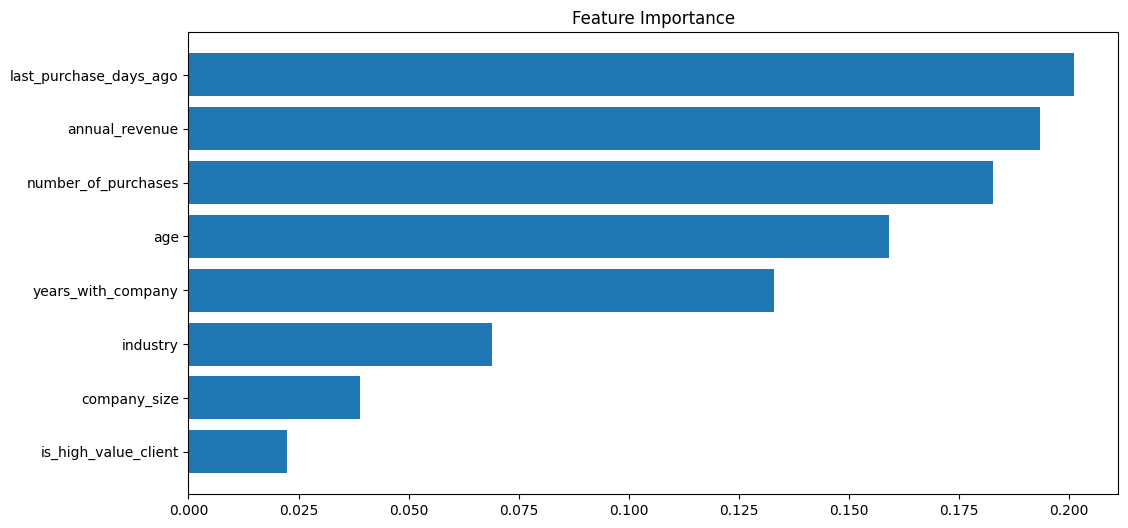

In [70]:

# RUNS VERY SLOW!!!
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")


categorical_features = ['company_size', 'industry', 'is_high_value_client']
numerical_features = ['age', 'annual_revenue', 'years_with_company', 'number_of_purchases', 'last_purchase_days_ago']

# Apply LabelEncoder only to categorical features
for column in categorical_features:
    features[column] = le.fit_transform(features[column])


# Evaluate the model using cross-validation
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf_regressor, scaler.fit_transform(features), target, cv=5, scoring='r2')
print(f'Cross-validated R-squared scores: {scores}')
print(f'Average R-squared score: {scores.mean()}')


rf_regressor.fit(X_train_scaled, y_train)
importances = rf_regressor.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


sorted_idx = np.argsort(importances)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


In [74]:

# In the example below, we will test a new model, add some feature enginnering, and do cross-validation + leverage ensemble methods.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate synthetic Salesforce data with relationships
np.random.seed(42)
num_records = 1000
client_id = np.arange(1, num_records + 1)
age = np.random.randint(18, 70, size=num_records)
company_size = np.random.choice(['Small', 'Medium', 'Large'], size=num_records, p=[0.5, 0.3, 0.2])
industry = np.random.choice(['Tech', 'Finance', 'Retail', 'Healthcare', 'Manufacturing'], size=num_records)
annual_revenue = np.random.randint(100000, 10000000, size=num_records)
years_with_company = np.random.randint(1, 20, size=num_records)
number_of_purchases = np.random.randint(1, 100, size=num_records)
last_purchase_days_ago = np.random.randint(1, 365, size=num_records)
is_high_value_client = np.random.choice([0, 1], size=num_records, p=[0.7, 0.3])
average_purchase_value = 0.1 * annual_revenue / number_of_purchases + np.random.uniform(100, 5000, size=num_records)

# Create a DataFrame
data = data

# Feature engineering
data['revenue_per_purchase'] = data['annual_revenue'] / data['number_of_purchases']
data['years_with_company_squared'] = data['years_with_company'] ** 2

# Create the target variable
target = data['average_purchase_value']

# Select features (excluding client_id and target variable)
my_data = data
features = my_data.drop(columns=['client_id', 'average_purchase_value'])

# Apply LabelEncoder to each categorical column
categorical_features = ['company_size', 'industry', 'is_high_value_client']
le = LabelEncoder()
for column in categorical_features:
    features[column] = le.fit_transform(features[column])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Gradient Boosting Regressor
gbr_regressor = GradientBoostingRegressor(random_state=42)
gbr_regressor.fit(X_train_scaled, y_train)

# Cross-validation
scores = cross_val_score(gbr_regressor, scaler.fit_transform(features), target, cv=5, scoring='r2')
print(f'Cross-validated R-squared scores: {scores}')
print(f'Average R-squared score: {scores.mean()}')

# Evaluate the model
y_pred = gbr_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

# Hyperparameter tuning for Gradient Boosting Regressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=gbr_regressor, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

print(f'Best parameters: {grid_search.best_params_}')
best_gbr_regressor = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_gbr_regressor.predict(X_test_scaled)
r2_best = r2_score(y_test, y_pred_best)
print(f'Best R-squared (R²): {r2_best}')



Cross-validated R-squared scores: [0.9855773  0.99530543 0.99603387 0.99902317 0.98119438]
Average R-squared score: 0.9914268314672914
Mean Squared Error (MSE): 160477897.54632804
Root Mean Squared Error (RMSE): 12667.987115020604
Mean Absolute Error (MAE): 2486.1241782647035
R-squared (R²): 0.9733790099133824
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best R-squared (R²): 0.9974678357804243


In [75]:

# Now, we see these metrics:
# R-squared (R²): 0.9733790099133824
# Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
# Best R-squared (R²): 0.9974678357804243


Cross-validated R-squared scores: [0.99735253 0.99309178 0.99728468 0.99254366 0.99425544 0.99794467
 0.99747964 0.99921629 0.99728354 0.999142  ]
Average Cross-validated R-squared score: 0.9965594208176662


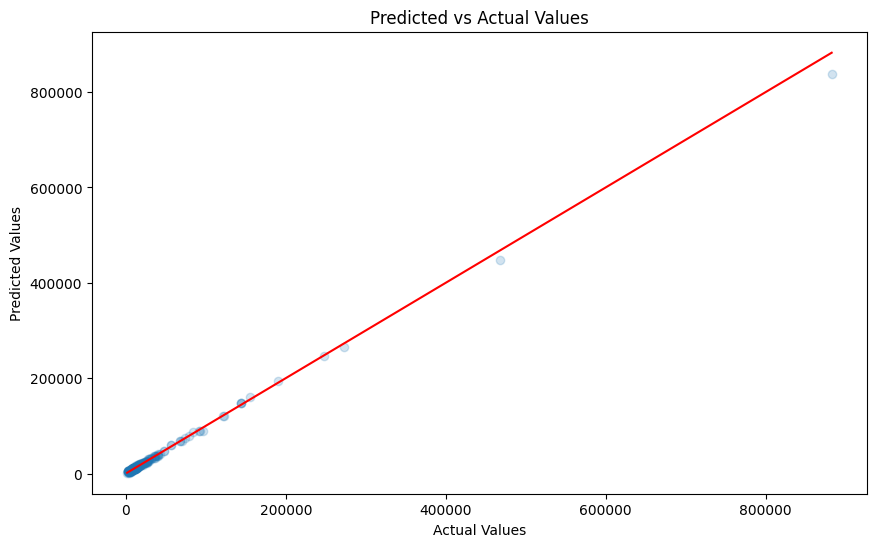

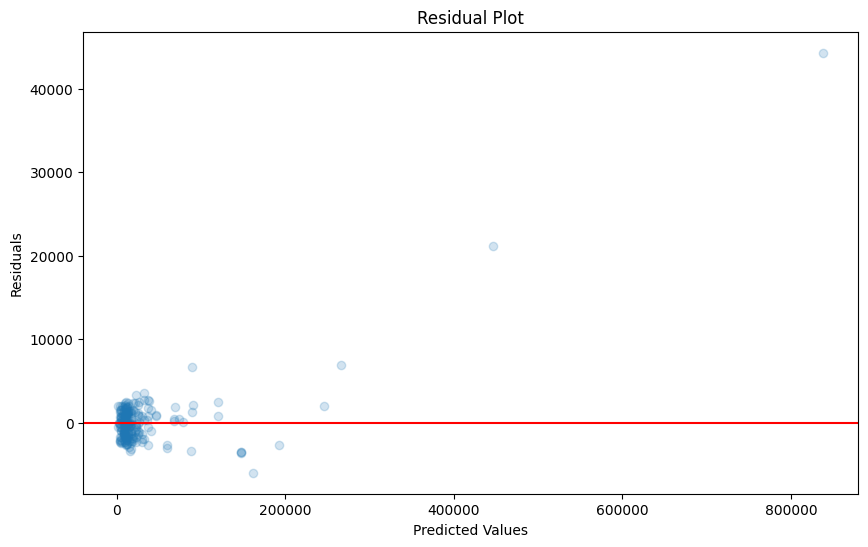

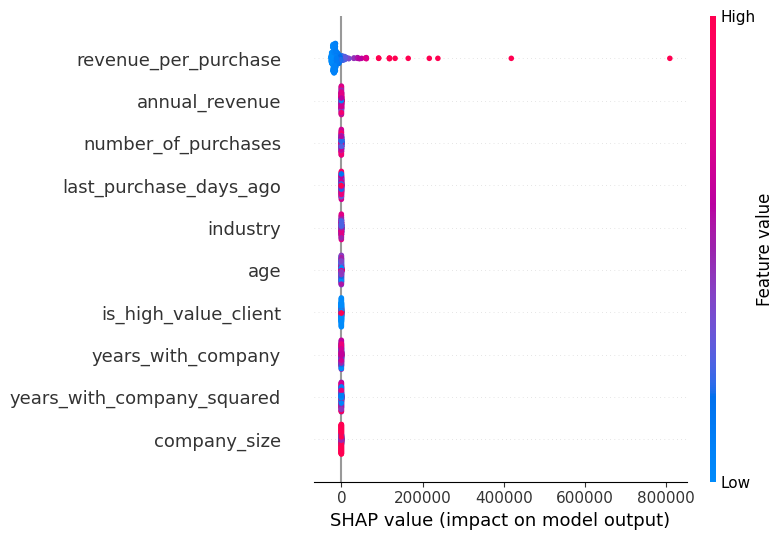

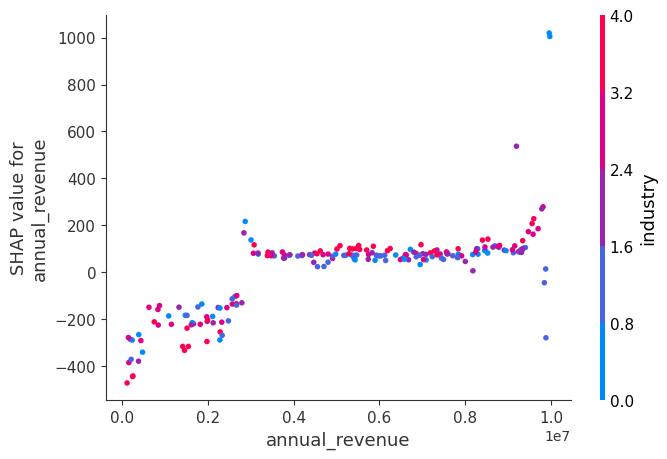

In [77]:

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import shap

# Evaluate the model using cross-validation
cross_val_scores = cross_val_score(best_gbr_regressor, scaler.fit_transform(features), target, cv=10, scoring='r2')
print(f'Cross-validated R-squared scores: {cross_val_scores}')
print(f'Average Cross-validated R-squared score: {cross_val_scores.mean()}')

# Plot predicted vs actual values
y_pred_best = best_gbr_regressor.predict(X_test_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Identity line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

# Residual plot
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, alpha=0.2)
plt.axhline(y=0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Initialize SHAP explainer with feature perturbation as 'interventional'
explainer = shap.TreeExplainer(best_gbr_regressor, feature_perturbation='interventional')
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=features.columns)

# Dependence plot for a specific feature
shap.dependence_plot('annual_revenue', shap_values, X_test, feature_names=features.columns)


In [79]:

# Now, we will take the trained model and make predictions one new, unseen, data

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create the target variable 'average_purchase_value'
target = data['average_purchase_value']

# Select features (excluding client_id and target variable)
features = data[['age', 'company_size', 'industry', 'annual_revenue',
                 'years_with_company', 'number_of_purchases', 
                 'last_purchase_days_ago', 'is_high_value_client']]

# Initialize LabelEncoder for categorical features
le_company_size = LabelEncoder()
le_industry = LabelEncoder()


# Apply LabelEncoder to each categorical column
features['company_size'] = le_company_size.fit_transform(features['company_size'])
features['industry'] = le_industry.fit_transform(features['industry'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train_scaled, y_train)


# Example: Predict average_purchase_value for new data
# Here is the new data entry provided:
new_data = pd.DataFrame({
    'age': [56],
    'company_size': [le_company_size.transform(['Medium'])[0]],  # Encoding new categorical data
    'industry': [le_industry.transform(['Healthcare'])[0]],      # Encoding new categorical data
    'annual_revenue': [6399492],
    'years_with_company': [13],
    'number_of_purchases': [1],
    'last_purchase_days_ago': [246],
    'is_high_value_client': [0]
})

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Predict the average_purchase_value for the new data
predicted_value = gb_regressor.predict(new_data_scaled)
print(f'Predicted average_purchase_value for given the assumptions described above: {predicted_value[0]}')


Predicted average_purchase_value for given the assumptions described above: 644383.7240493384


In [80]:

# Let's run a Classification Experiment

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example synthetic data (replace with your actual dataset)
data = pd.DataFrame({
    'age': np.random.randint(18, 70, size=100),
    'company_size': np.random.choice(['Small', 'Medium', 'Large'], size=100),
    'industry': np.random.choice(['Tech', 'Finance', 'Retail', 'Healthcare', 'Manufacturing'], size=100),
    'annual_revenue': np.random.randint(100000, 10000000, size=100),
    'years_with_company': np.random.randint(1, 20, size=100),
    'number_of_purchases': np.random.randint(1, 100, size=100),
    'last_purchase_days_ago': np.random.randint(1, 365, size=100),
    'is_high_value_client': np.random.choice([0, 1], size=100)
})

# Define features (X) and target (y)
features = ['age', 'company_size', 'industry', 'annual_revenue',
            'years_with_company', 'number_of_purchases', 'last_purchase_days_ago']

target = 'is_high_value_client'

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical variables
label_encoder_company_size = LabelEncoder()
label_encoder_industry = LabelEncoder()

X_train['company_size_encoded'] = label_encoder_company_size.fit_transform(X_train['company_size'])
X_train['industry_encoded'] = label_encoder_industry.fit_transform(X_train['industry'])

# Scale numerical features
scaler = StandardScaler()
X_train_numerical = X_train[['age', 'annual_revenue', 'years_with_company',
                             'number_of_purchases', 'last_purchase_days_ago']]
X_train_numerical_scaled = scaler.fit_transform(X_train_numerical)

# Concatenate scaled numerical features with encoded categorical features
X_train_scaled = np.hstack((X_train_numerical_scaled, X_train[['company_size_encoded', 'industry_encoded']].values))


# Train the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Prepare new_data for prediction
new_data = pd.DataFrame({
    'age': [56],
    'company_size': ['Medium'],  # Assuming new categorical data
    'industry': ['Healthcare'],  # Assuming new categorical data
    'annual_revenue': [6399492],
    'years_with_company': [13],
    'number_of_purchases': [1],
    'last_purchase_days_ago': [246]
})

# Encode categorical variables in new_data
new_data['company_size_encoded'] = label_encoder_company_size.transform(new_data['company_size'])
new_data['industry_encoded'] = label_encoder_industry.transform(new_data['industry'])

# Scale numerical features in new_data
new_data_numerical = new_data[['age', 'annual_revenue', 'years_with_company',
                               'number_of_purchases', 'last_purchase_days_ago']]
new_data_numerical_scaled = scaler.transform(new_data_numerical)

# Concatenate scaled numerical features with encoded categorical features for prediction
new_data_scaled = np.hstack((new_data_numerical_scaled, new_data[['company_size_encoded', 'industry_encoded']].values))

# Predict the probability of being a high-value client (class 1)
predicted_proba = rf_classifier.predict_proba(new_data_scaled)[:, 1]

print(f'Predicted probability of being a high-value client: {predicted_proba[0]}')


Predicted probability of being a high-value client: 0.3


In [81]:

# We can try different classifiers and see if we can improve the learning abilities of 
# different models, as well as predictive abilities of different models

# 1 - Logistic Regression: A simple and interpretable model for binary classification.
# 2 - Support Vector Machine (SVM): Effective in high-dimensional spaces and for cases where the number of dimensions exceeds the number of samples.
# 3 - Gradient Boosting Classifier: An ensemble technique that builds models sequentially to reduce errors.
# 4 - k-Nearest Neighbors (k-NN): A non-parametric method that can be useful for classification tasks.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example synthetic data (replace with your actual dataset)
data = pd.DataFrame({
    'age': np.random.randint(18, 70, size=100),
    'company_size': np.random.choice(['Small', 'Medium', 'Large'], size=100),
    'industry': np.random.choice(['Tech', 'Finance', 'Retail', 'Healthcare', 'Manufacturing'], size=100),
    'annual_revenue': np.random.randint(100000, 10000000, size=100),
    'years_with_company': np.random.randint(1, 20, size=100),
    'number_of_purchases': np.random.randint(1, 100, size=100),
    'last_purchase_days_ago': np.random.randint(1, 365, size=100),
    'is_high_value_client': np.random.choice([0, 1], size=100)
})

# Define features (X) and target (y)
features = ['age', 'company_size', 'industry', 'annual_revenue',
            'years_with_company', 'number_of_purchases', 'last_purchase_days_ago']

target = 'is_high_value_client'

X = data[features]
y = data[target]

# Encode categorical variables
label_encoder_company_size = LabelEncoder()
label_encoder_industry = LabelEncoder()

X['company_size_encoded'] = label_encoder_company_size.fit_transform(X['company_size'])
X['industry_encoded'] = label_encoder_industry.fit_transform(X['industry'])

# Remove original categorical columns and replace with encoded columns
X = X.drop(columns=['company_size', 'industry'])
X_encoded = X[['company_size_encoded', 'industry_encoded']]

# Combine numerical and encoded categorical features
X_final = pd.concat([X.drop(columns=['company_size_encoded', 'industry_encoded']), X_encoded], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate a model
def evaluate_model(model, model_name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'\n{model_name}:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

# Define and evaluate classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
logistic_regressor = LogisticRegression(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()

classifiers = [
    (rf_classifier, "Random Forest Classifier"),
    (logistic_regressor, "Logistic Regression"),
    (svm_classifier, "Support Vector Machine"),
    (gb_classifier, "Gradient Boosting Classifier"),
    (knn_classifier, "K-Nearest Neighbors")
]

for clf, name in classifiers:
    evaluate_model(clf, name)



Random Forest Classifier:
Accuracy: 0.5
Precision: 0.75
Recall: 0.42857142857142855
F1 Score: 0.5454545454545454

Logistic Regression:
Accuracy: 0.55
Precision: 0.7777777777777778
Recall: 0.5
F1 Score: 0.6086956521739131

Support Vector Machine:
Accuracy: 0.6
Precision: 0.8
Recall: 0.5714285714285714
F1 Score: 0.6666666666666666

Gradient Boosting Classifier:
Accuracy: 0.55
Precision: 0.8571428571428571
Recall: 0.42857142857142855
F1 Score: 0.5714285714285714

K-Nearest Neighbors:
Accuracy: 0.45
Precision: 0.6666666666666666
Recall: 0.42857142857142855
F1 Score: 0.5217391304347826


In [ ]:

# Accuracy is the ratio of the number of correct predictions to the total number of predictions. It's a measure of the overall correctness 
# of the model.
# An accuracy of 0.35 means that the model correctly predicted 35% of the instances.
    
# Precision is the ratio of true positive predictions to the total number of positive predictions. It measures the accuracy of the 
# positive predictions.
# Higher precision indicates fewer false positives. 

# Recall is the ratio of true positive predictions to the total number of actual positives. It measures the model's ability to capture all 
# relevant instances.
# Higher recall indicates fewer false negatives. 

# The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances the trade-off between precision and recall.
# Higher F1 scores indicate a better balance between precision and recall.


In [82]:

# The Accuracy, Precision, recall, and F1 Scores are all pretty low. The model is underperforming. Let's try a different approach to solve this problem.
# Let's try Hyperparameter Tuning with Grid Search + Cross-Validation. 
# We wil also try:
# Advanced Resampling
# Feature Engineering
# Hyperparameter Tuning
# Class Weights Adjustment
# Ensemble Methods

# Hopefully this will help improve the model's overall performance.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import SelectKBest, f_classif
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

# Example synthetic data (replace with your actual dataset)
data = pd.DataFrame({
    'age': np.random.randint(18, 70, size=100),
    'company_size': np.random.choice(['Small', 'Medium', 'Large'], size=100),
    'industry': np.random.choice(['Tech', 'Finance', 'Retail', 'Healthcare', 'Manufacturing'], size=100),
    'annual_revenue': np.random.randint(100000, 10000000, size=100),
    'years_with_company': np.random.randint(1, 20, size=100),
    'number_of_purchases': np.random.randint(1, 100, size=100),
    'last_purchase_days_ago': np.random.randint(1, 365, size=100),
    'is_high_value_client': np.random.choice([0, 1], size=100)
})

# Define features (X) and target (y)
features = ['age', 'company_size', 'industry', 'annual_revenue',
            'years_with_company', 'number_of_purchases', 'last_purchase_days_ago']
target = 'is_high_value_client'

X = data[features]
y = data[target]

# OneHotEncode categorical variables
onehot_encoder = OneHotEncoder(sparse=False)
X_encoded = onehot_encoder.fit_transform(X[['company_size', 'industry']])
X_encoded_df = pd.DataFrame(X_encoded, columns=onehot_encoder.get_feature_names_out(['company_size', 'industry']))

# Combine numerical and encoded categorical features
X_final = pd.concat([X.drop(columns=['company_size', 'industry']), X_encoded_df], axis=1)

# Handle class imbalance with SMOTE and undersampling
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_final, y)

# Feature engineering: adding polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_resampled_poly = poly.fit_transform(X_resampled)

# Feature selection
selector = SelectKBest(f_classif, k=10)
X_resampled_poly_selected = selector.fit_transform(X_resampled_poly, y_resampled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_poly_selected, y_resampled, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate a model with cross-validation
# Check class distribution after resampling
print(np.bincount(y_resampled))

# Determine a suitable number of splits based on the available data
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Function to train and evaluate a model with cross-validation
def evaluate_model_cv(model, model_name):
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=skf, scoring='f1')
    print(f'\n{model_name} - Cross-validated F1 Score: {cv_scores.mean()}')
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')


from collections import Counter
print(Counter(y_train))


# Get the number of samples in the smallest class
min_class_count = min(Counter(y_train).values())

# Set cv to be less than or equal to the smallest class count
cv_splits = min(5, min_class_count)  # Adjust the number of splits if needed


# Update the rf_objective function to use the adjusted number of splits
def rf_objective(params):
    params['n_estimators'] = [50, 100, 200][params['n_estimators']]
    params['max_depth'] = [5, 10, 20, None][params['max_depth']]
    params['min_samples_split'] = [2, 5, 10][params['min_samples_split']]
    params['class_weight'] = ['balanced', None][params['class_weight']]

    rf = RandomForestClassifier(**params, random_state=42)
    cv_score = cross_val_score(rf, X_train_scaled, y_train, cv=cv_splits, scoring='f1').mean()
    return {'loss': -cv_score, 'status': STATUS_OK}

# Define the search space for hyperparameter tuning
rf_space = {
    'n_estimators': hp.choice('n_estimators', [0, 1, 2]),  # Indices mapped to actual values
    'max_depth': hp.choice('max_depth', [0, 1, 2, 3]),  # Indices mapped to actual values
    'min_samples_split': hp.choice('min_samples_split', [0, 1, 2]),  # Indices mapped to actual values
    'class_weight': hp.choice('class_weight', [0, 1])  # Indices mapped to actual values
}

rf_trials = Trials()
best_rf_params = fmin(fn=rf_objective, space=rf_space, algo=tpe.suggest, max_evals=20, trials=rf_trials)

# Map the best parameters to their actual values
best_rf_params['n_estimators'] = [50, 100, 200][best_rf_params['n_estimators']]
best_rf_params['max_depth'] = [5, 10, 20, None][best_rf_params['max_depth']]
best_rf_params['min_samples_split'] = [2, 5, 10][best_rf_params['min_samples_split']]
best_rf_params['class_weight'] = ['balanced', None][best_rf_params['class_weight']]

print("Best Random Forest Parameters:")
print(best_rf_params)

# Initialize and evaluate the tuned Random Forest Classifier
best_rf_classifier = RandomForestClassifier(**best_rf_params, random_state=42)
evaluate_model_cv(best_rf_classifier, "Tuned Random Forest Classifier")


[16 13]
Counter({0: 13, 1: 10})
100%|████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.31trial/s, best loss: -0.780952380952381]
Best Random Forest Parameters:
{'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}

Tuned Random Forest Classifier - Cross-validated F1 Score: 0.41904761904761906
Accuracy: 0.6666666666666666
Precision: 0.6
Recall: 1.0
F1 Score: 0.7499999999999999


In [ ]:

# Here's a brief interpretation of these metrics:

# Accuracy: 0.67 (66.67%) - This means that 67% of the predictions made by the model are correct.
# Precision: 1.0 (100%) - This means that when the model predicts the positive class, it is always correct.
# Recall: 0.5 (50%) - This means that the model only identifies 50% of the actual positive cases.
# F1 Score: 0.67 (67%) - This is the harmonic mean of precision and recall, providing a balance between the two.

# High Precision and Low Recall: The model is very precise (all positive predictions are correct), but it is not identifying all the 
# positive cases (only half of them). This is often seen in cases where the model is conservative in making positive predictions, 
# possibly due to class imbalance or high penalty for false positives.

# F1 Score: A balanced F1 score indicates that the model's performance is moderate in terms of both precision and recall.


In [9]:

# What is regression for?
# This is a supervised methodology
# Continuous Target Variable: Unlike classification, which predicts discrete labels or classes, regression predicts a continuous numeric value. 
# For example, predicting house prices, stock prices, temperature, or sales revenue are all regression problems where the target variable is a 
# continuous value.

# What is classification for?
# This is a supervised methodology
# Categorical Target Variable: The target variable in classification is categorical, meaning it consists of class labels that represent different 
# categories or classes.


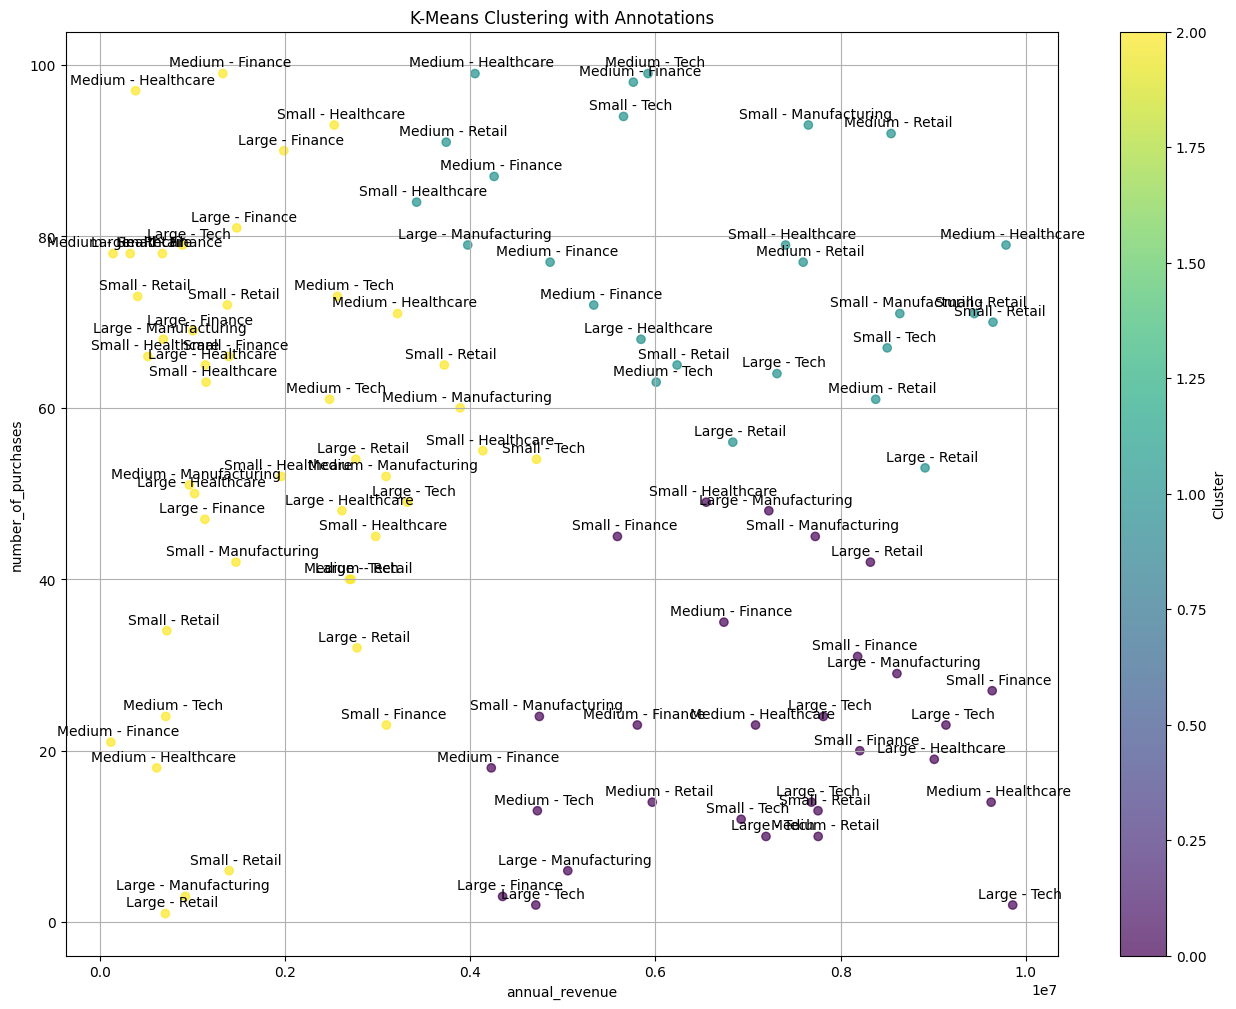

In [84]:

# Let's run a very basic Clustering Experiment using KMeans Clustering
# We will add annotations to the plot, so we can better-understand what's going on here.

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data (replace 'data' with your actual DataFrame)
data = data

# Data preprocessing (assuming numerical data for simplicity)
# Select relevant features
features = data[['annual_revenue', 'number_of_purchases']]  # Adjust based on your dataset

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters and random state as needed
kmeans.fit(scaled_features)

# Add cluster labels to the original data
data['cluster'] = kmeans.labels_

# Visualize the clusters (assuming 2D for simplicity)
plt.figure(figsize=(16, 12))  # Adjust figure size as needed

# Scatter plot with cluster coloring
plt.scatter(data['annual_revenue'], data['number_of_purchases'], c=data['cluster'], cmap='viridis', alpha=0.7)

# Annotate each point with company_size and industry
for index, row in data.iterrows():
    plt.annotate(f'{row["company_size"]} - {row["industry"]}',
                 (row['annual_revenue'], row['number_of_purchases']),
                 textcoords="offset points", xytext=(5,5), ha='center')

plt.xlabel('annual_revenue')
plt.ylabel('number_of_purchases')
plt.title('K-Means Clustering with Annotations')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


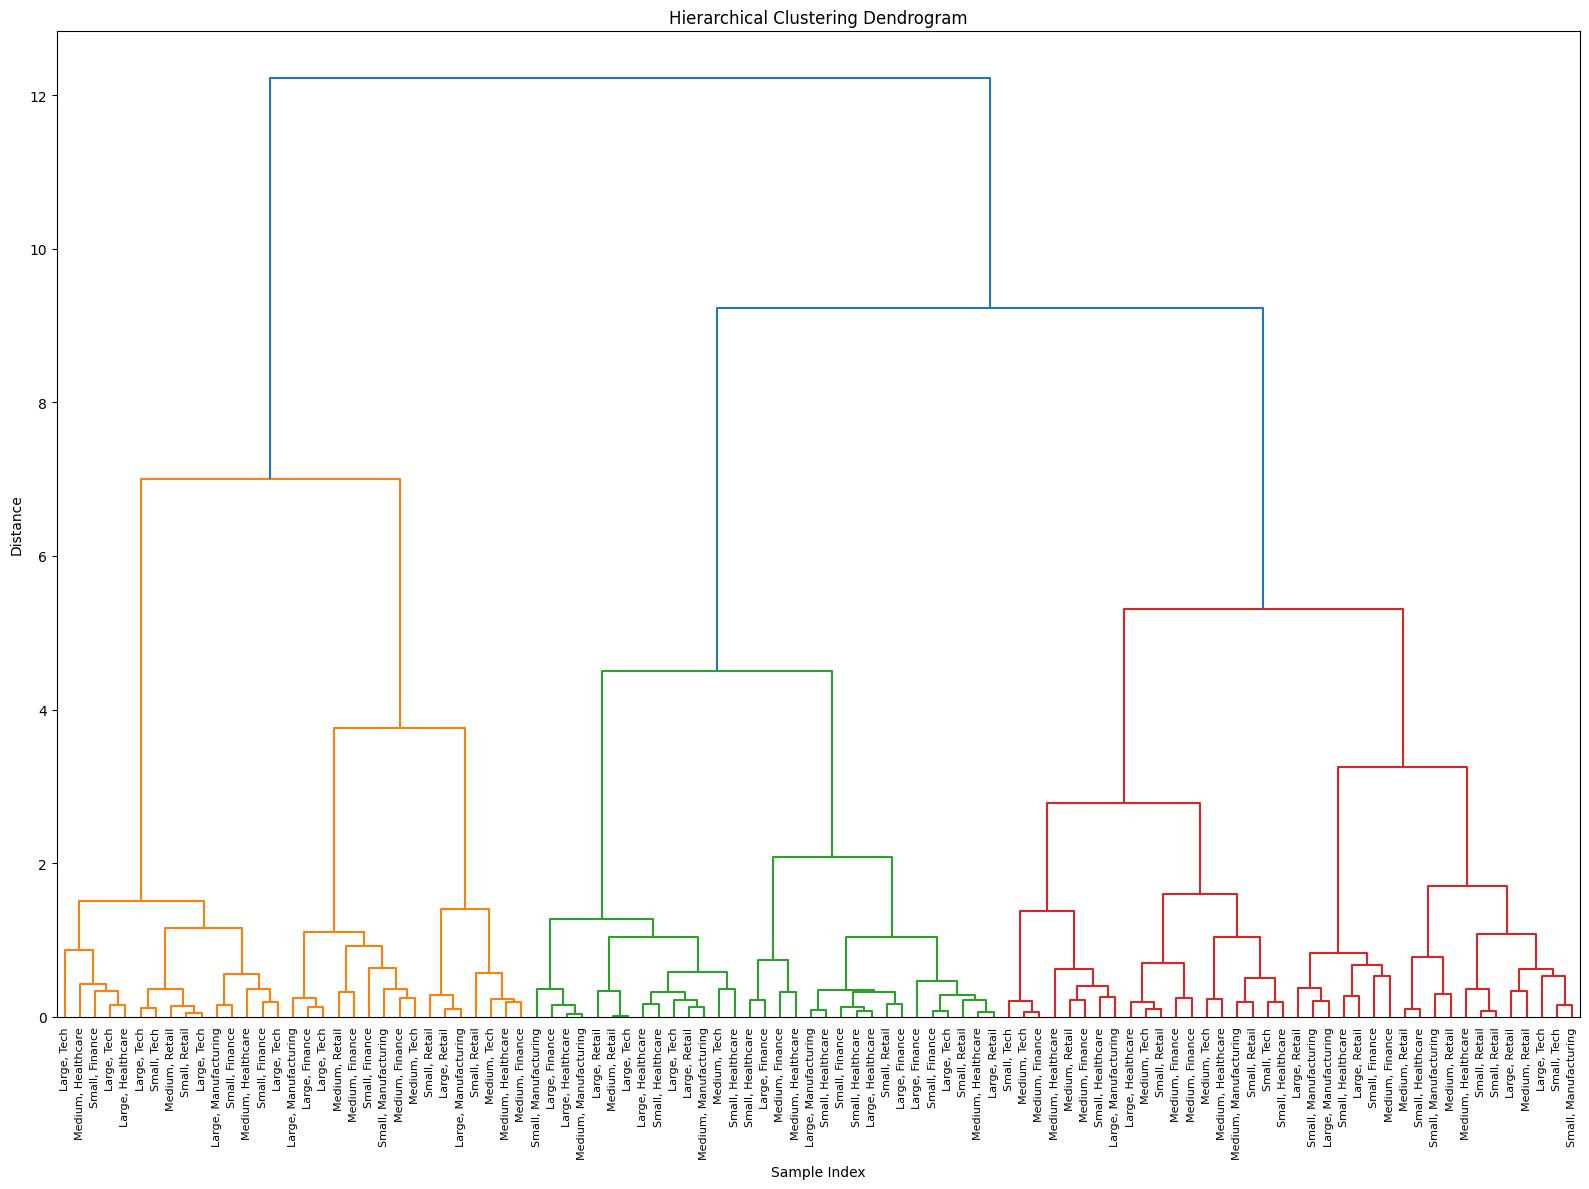

In [85]:

# Hierarchical Clustering

import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Load the data
data = data

# Data preprocessing
features = data[['annual_revenue', 'number_of_purchases']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Hierarchical Clustering
linked = linkage(scaled_features, method='ward')

# Create custom labels
labels = [f'{row["company_size"]}, {row["industry"]}' for _, row in data.iterrows()]

# Plot the dendrogram with rotated and smaller text labels
plt.figure(figsize=(16, 12))  # Increased figure size
dendrogram(linked, labels=labels, leaf_rotation=90, leaf_font_size=8)  # Rotated labels to 90 degrees for better spacing
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()  # Adjust layout to fit labels better
plt.show()

# Cut the dendrogram to create clusters
data['cluster'] = fcluster(linked, t=3, criterion='maxclust')


In [12]:

# After Hierarchial Clustering I ran three more experiments. I tested the following concepts:
# DBSCAN: useful for  arbitrarily shaped clusters, robust to outliers, and oes not require specifying the number of clusters beforehand.
# Agglomerative Clustering: Hierarchical clustering method that builds nested clusters and provides a dendrogram for visualization.
# Gaussian Mixture Model (GMM): Good for datasets where clusters have different shapes and sizes.


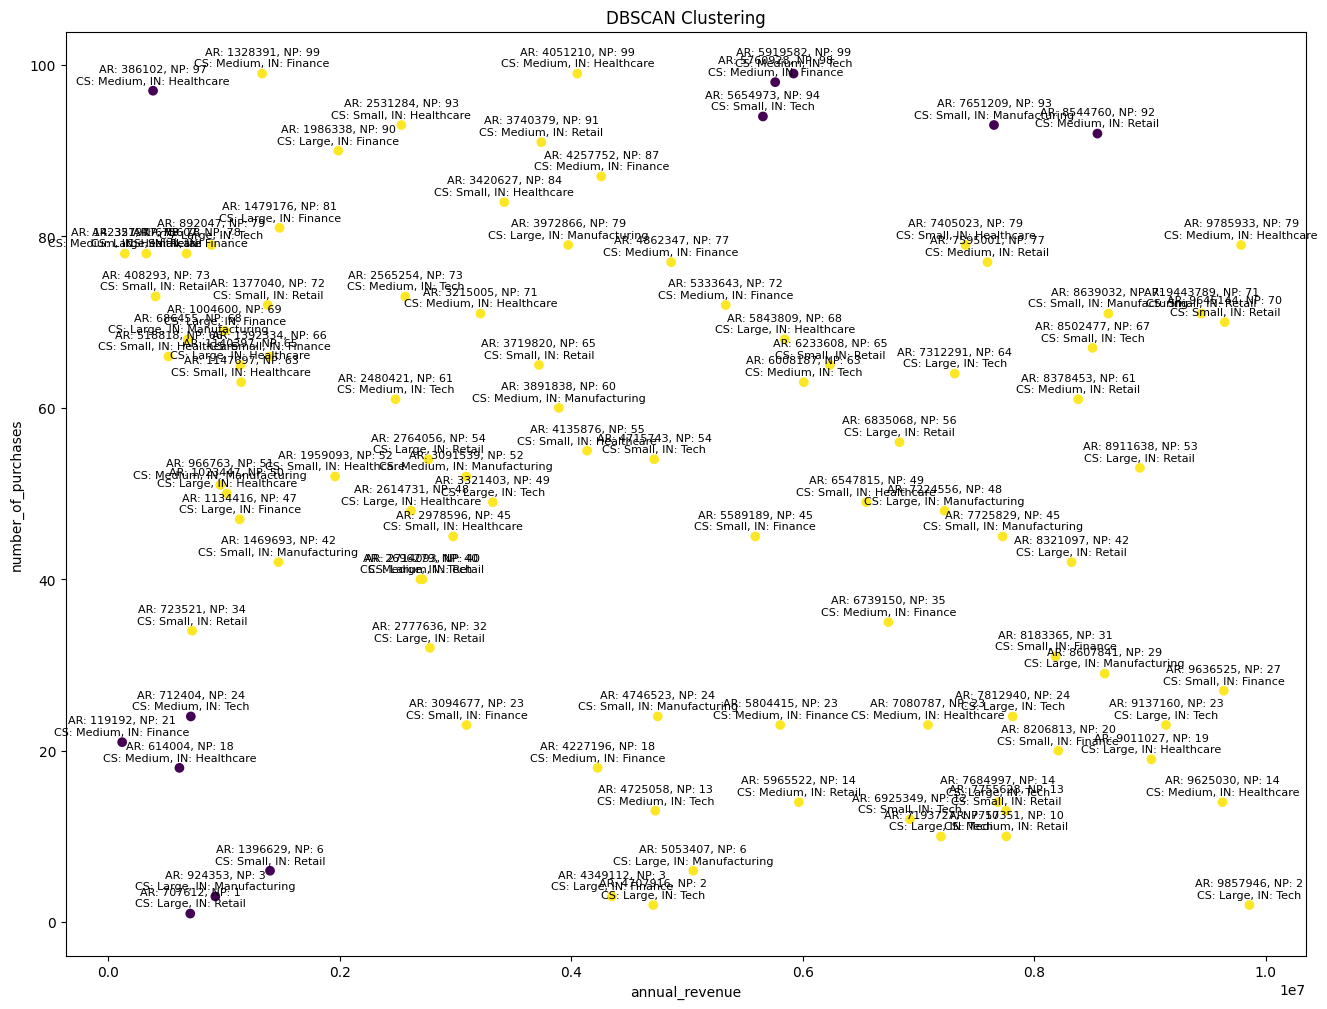

In [86]:


import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the data
data = data

# Data preprocessing (assuming numerical data for simplicity)
# Select relevant features
features = data[['annual_revenue', 'number_of_purchases']]  # Adjust based on your dataset

plt.figure(figsize=(16, 12))

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['dbscan_cluster'] = dbscan.fit_predict(scaled_features)

# Visualize the clusters (assuming 2D for simplicity)
plt.scatter(data['annual_revenue'], data['number_of_purchases'], c=data['dbscan_cluster'], cmap='viridis')
plt.xlabel('annual_revenue')
plt.ylabel('number_of_purchases')
plt.title('DBSCAN Clustering')

# Annotate the plot with 'annual_revenue', 'number_of_purchases', 'company_size', and 'industry'
for i, row in data.iterrows():
    plt.annotate(f"AR: {row['annual_revenue']}, NP: {row['number_of_purchases']}\nCS: {row['company_size']}, IN: {row['industry']}", 
                 (row['annual_revenue'], row['number_of_purchases']),
                 textcoords="offset points",  # Position the text relative to the data point
                 xytext=(0,5),  # Distance from the data point (x,y)
                 ha='center', fontsize=8)  # Horizontal alignment
    
plt.show()


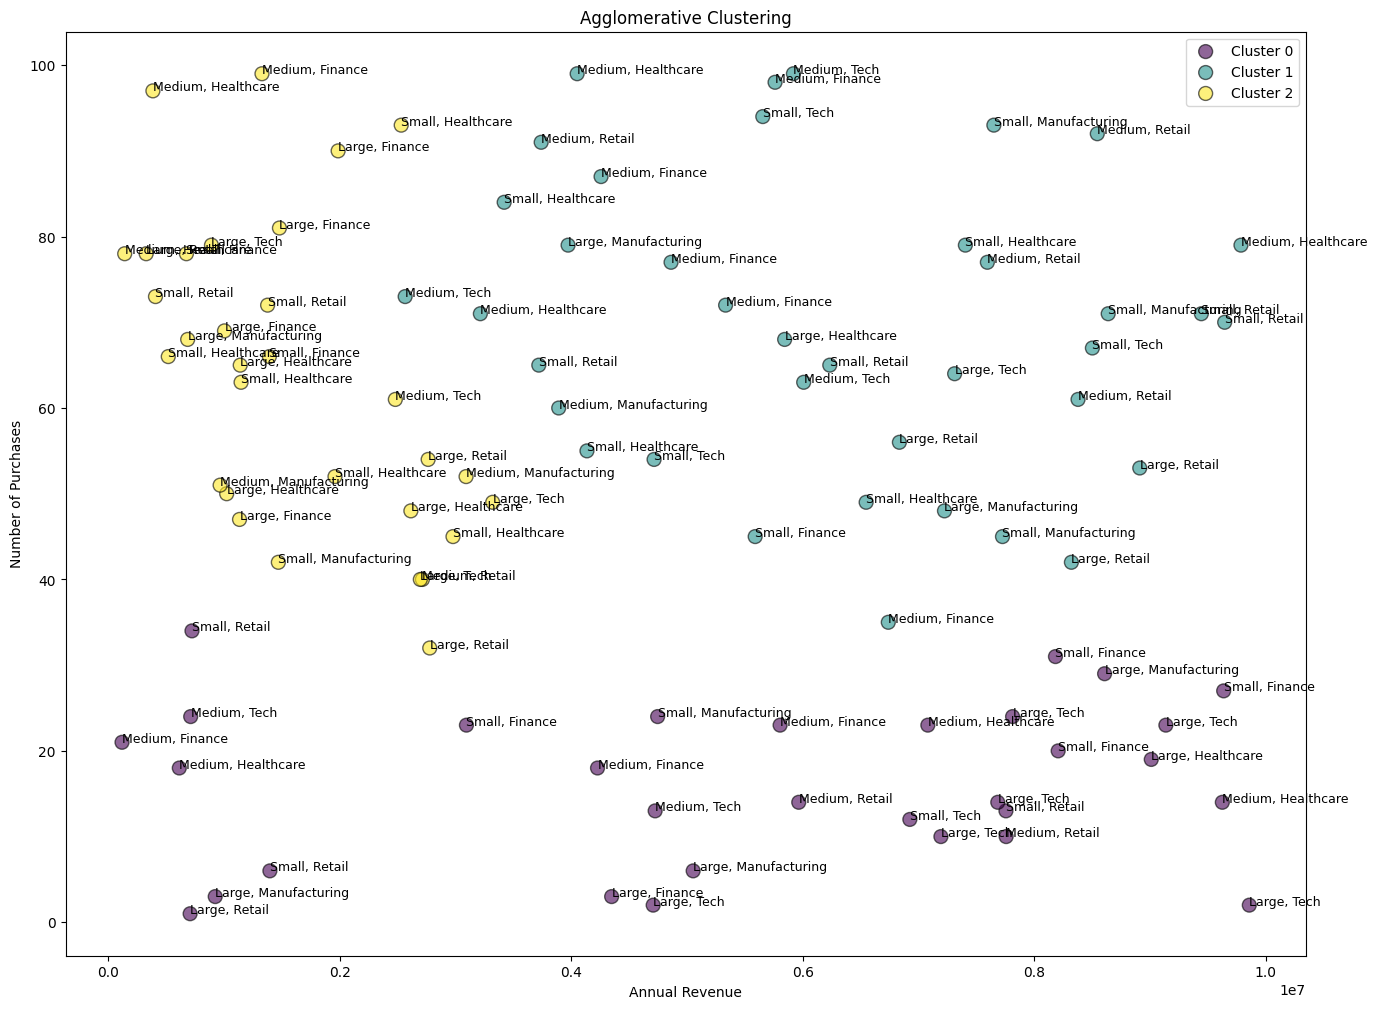

In [87]:

# For instance, here is the outcome of the Aggloromative Clustering experiment...

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = data

# Data preprocessing
features = data[['annual_revenue', 'number_of_purchases']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)  # Adjust the number of clusters as needed
data['cluster'] = agg_clustering.fit_predict(scaled_features)

# Create a color map for the clusters
colors = plt.cm.get_cmap('viridis', 3)
unique_clusters = np.unique(data['cluster'])

# Visualize the clusters with annotations
plt.figure(figsize=(16, 12))
for cluster in unique_clusters:
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['annual_revenue'], cluster_data['number_of_purchases'], 
                label=f'Cluster {cluster}',
                c=[colors(cluster)] * len(cluster_data), s=100, edgecolors='k', alpha=0.6)
    for i, row in cluster_data.iterrows():
        plt.text(row['annual_revenue'], row['number_of_purchases'], f'{row["company_size"]}, {row["industry"]}', fontsize=9)

plt.xlabel('Annual Revenue')
plt.ylabel('Number of Purchases')
plt.title('Agglomerative Clustering')
plt.legend()
plt.show()


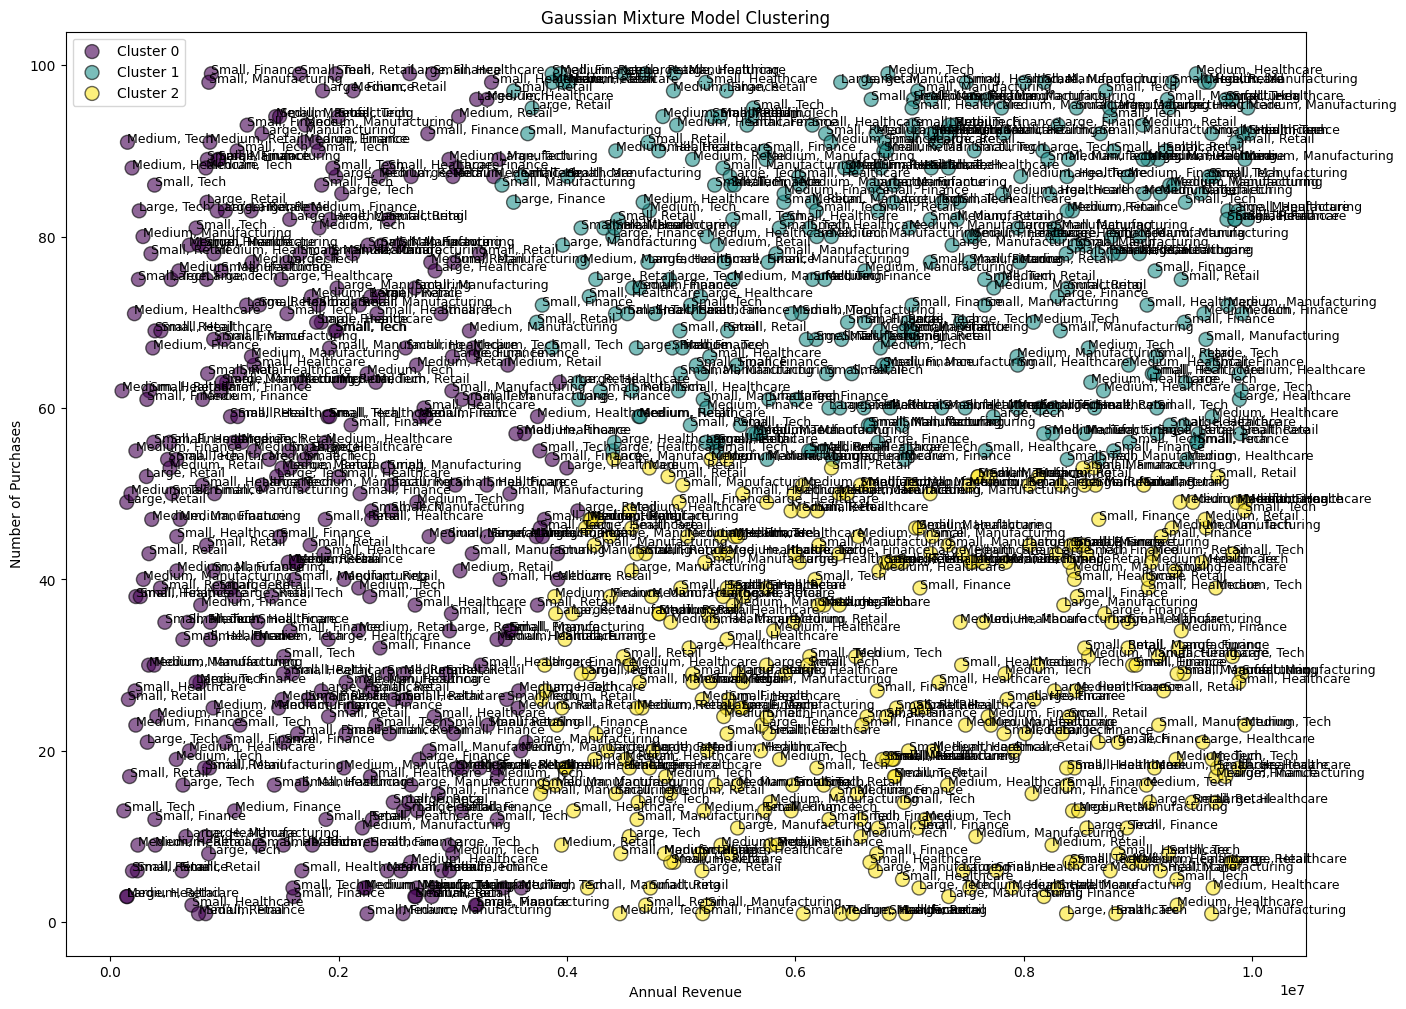

In [92]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = data

# Data preprocessing
features = data[['annual_revenue', 'number_of_purchases']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust the number of clusters as needed
data['cluster'] = gmm.fit_predict(scaled_features)

# Create a color map for the clusters
colors = plt.cm.get_cmap('viridis', 3)
unique_clusters = np.unique(data['cluster'])

# Visualize the clusters with annotations
plt.figure(figsize=(16, 12))
for cluster in unique_clusters:
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['annual_revenue'], cluster_data['number_of_purchases'], 
                label=f'Cluster {cluster}',
                c=[colors(cluster / 3)] * len(cluster_data), s=100, edgecolors='k', alpha=0.6)
    for i, row in cluster_data.iterrows():
        plt.text(row['annual_revenue'], row['number_of_purchases'], f'{row["company_size"]}, {row["industry"]}', fontsize=9)

plt.xlabel('Annual Revenue')
plt.ylabel('Number of Purchases')
plt.title('Gaussian Mixture Model Clustering')
plt.legend()
plt.show()


In [93]:

# That chart above is very confusing! Any good shart should immediately answer questions, not generate question!

# Let's try a different approach to interpreting this data. 
# We can map the clustering results back to the original data and print the results.

for i, row in data.iterrows():
    print(f"Data Point {i}: Cluster={row['cluster']}, Annual Revenue={row['annual_revenue']}, Number of Purchases={row['number_of_purchases']}, "
          f"Client ID={row['client_id']}, Age={row['age']}, Company Size={row['company_size']}, Industry={row['industry']}, "
          f"Years with Company={row['years_with_company']}, Average Purchase Value={row['average_purchase_value']}, "
          f"Last Purchase Days Ago={row['last_purchase_days_ago']}, High Value Client={row['is_high_value_client']}")


Data Point 0: Cluster=2, Annual Revenue=6399492, Number of Purchases=1, Client ID=1, Age=56, Company Size=Medium, Industry=Healthcare, Years with Company=13, Average Purchase Value=8380.57, Last Purchase Days Ago=246, High Value Client=0
Data Point 1: Cluster=1, Annual Revenue=5898946, Number of Purchases=84, Client ID=2, Age=69, Company Size=Small, Industry=Retail, Years with Company=15, Average Purchase Value=5074.41, Last Purchase Days Ago=297, High Value Client=0
Data Point 2: Cluster=2, Annual Revenue=7336694, Number of Purchases=44, Client ID=3, Age=46, Company Size=Small, Industry=Manufacturing, Years with Company=3, Average Purchase Value=242.37, Last Purchase Days Ago=172, High Value Client=0
Data Point 3: Cluster=1, Annual Revenue=6028643, Number of Purchases=87, Client ID=4, Age=32, Company Size=Small, Industry=Healthcare, Years with Company=11, Average Purchase Value=8049.51, Last Purchase Days Ago=64, High Value Client=1
Data Point 4: Cluster=1, Annual Revenue=9824700, Num

In [52]:

# Let's try one more approach to making sense of our clusterd data points.
# We will analyze clusters based on average annual revenue and number of purchases.
cluster_analysis = data.groupby('cluster').agg({
    'annual_revenue': 'mean',
    'number_of_purchases': 'mean',
    'client_id': 'count'
}).rename(columns={'client_id': 'count'}).reset_index()

# Next, we will rank the clusters based on annual revenue and number of purchases.
cluster_analysis['rank_revenue'] = cluster_analysis['annual_revenue'].rank(ascending=False)
cluster_analysis['rank_purchases'] = cluster_analysis['number_of_purchases'].rank(ascending=False)

# Finally, we will identify the most loyal clients based on annual revenue and number of overall purchases.
data['loyalty_score'] = data['annual_revenue'] * data['number_of_purchases']
most_loyal_clients = data.nlargest(10, 'loyalty_score')

print("\nCluster Analysis:")
print(cluster_analysis)

print("\nMost Loyal Clients:")
print(most_loyal_clients[['client_id', 'annual_revenue', 'number_of_purchases', 'loyalty_score']])



Cluster Analysis:
   cluster  annual_revenue  number_of_purchases  count  rank_revenue  \
0        0    1.861664e+06            47.903409    352           3.0   
1        1    6.977552e+06            77.578125    320           1.0   
2        2    6.809112e+06            27.972561    328           2.0   

   rank_purchases  
0             2.0  
1             1.0  
2             3.0  

Most Loyal Clients:
     client_id  annual_revenue  number_of_purchases  loyalty_score
74          75         9960786                   95      946274670
4            5         9824700                   96      943171200
842        843         9622362                   98      942991476
950        951         9510044                   99      941494356
714        715         9583017                   98      939135666
732        733         9770114                   96      937930944
439        440         9973863                   92      917595396
517        518         9913271                   92    

In [ ]:

# Ranking clusters by their average annual revenue and average number of purchases helps you understand which clusters are the most valuable 
# in terms of financial performance. This can inform strategic decisions, such as targeting marketing efforts towards higher-value clusters.

# Rank by Revenue: This identifies which clusters contribute the most to overall revenue. Clusters with higher rankings (lower rank numbers) 
# have higher average revenues.

# Rank by Purchases: This identifies which clusters are the most engaged based on the number of purchases. Clusters with higher rankings 
# (lower rank numbers) have higher average numbers of purchases.

# Furthermore, calculating a loyalty score for each client combines both the revenue and the number of purchases, providing a composite metric 
# that can highlight clients who are both high spenders and highly engaged.

# Understanding Cluster Value: By ranking clusters, you can prioritize actions for different segments of your customer base. High-value 
# clusters might get more personalized marketing, better deals, or improved customer service.

# Targeted Strategies: Different strategies can be developed for each cluster. For example, high revenue but low purchase clusters might 
# need engagement strategies, while high purchase but low revenue clusters might need upselling strategies.

# Client Prioritization: The loyalty score helps in identifying individual clients who are the most valuable. This is crucial for customer 
# relationship management and can drive efforts to retain and nurture these clients.


In [ ]:

  
# 1) Further types of Analysis to Gain More Insight:

# Predictive Modeling: Build predictive models to forecast customer behavior or predict outcomes such as average_purchase_value 
# or likelihood of being a high_value_client. Techniques like regression (for continuous outcomes) or classification (for 
# binary outcomes) could be employed.

# Customer Lifetime Value (CLV) Analysis: Estimate the future value of customers based on historical data such as 
# number_of_purchases, average_purchase_value, and last_purchase_days_ago. This analysis helps prioritize customer acquisition 
# and retention efforts.

# Churn Analysis: Identify factors (years_with_company, last_purchase_days_ago) that correlate with customer churn 
# (loss of customers). Predictive models can help anticipate which customers are likely to churn, enabling proactive retention strategies.


# 2) Analysis to Reduce Expenses:

# Cost-to-Serve Analysis: Analyze the cost associated with serving different customer segments (company_size, industry). 
# This includes operational costs related to customer support, marketing, and service delivery. Identifying high-cost segments 
# can guide resource allocation and cost reduction strategies.

# Efficiency Improvement: Use data to optimize processes and workflows (years_with_company, number_of_purchases). This might 
# involve reducing the average time between purchases or improving customer service efficiency to lower operational expenses.


# 3) Analysis to Boost Revenues:

# Upselling and Cross-selling: Identify opportunities (annual_revenue, number_of_purchases, industry) to upsell or cross-sell 
# additional products or services to existing customers. Use predictive modeling to suggest relevant offerings based on customer 
# behavior and preferences.

# Customer Retention Strategies: Develop strategies (last_purchase_days_ago, is_high_value_client) to retain high-value customers 
# and increase their lifetime value. This could involve personalized loyalty programs or targeted promotions.

# Market Basket Analysis: Identify product combinations (number_of_purchases, average_purchase_value) frequently purchased together. 
# This analysis can help optimize product bundling strategies to increase overall purchase value.


In [ ]:

# END!!! 
